In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\91981\Desktop\Imarticus Course\ML\House Price Prediction Dataset.csv')
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [2]:
data = data.iloc[:,1:]

In [3]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [4]:
cat = []
num = []

for i in data.columns:
    if data[i].nunique() < 10:
        print(i,data[i].nunique(), data[i].unique())
        cat.append(i)
    else:
        num.append(i)

Bedrooms 5 [5 2 4 1 3]
Bathrooms 4 [4 2 1 3]
Floors 3 [3 2 1]
Location 4 ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition 4 ['Excellent' 'Good' 'Fair' 'Poor']
Garage 2 ['No' 'Yes']


In [5]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [6]:
num

['Area', 'YearBuilt', 'Price']

In [7]:
data['Bedrooms'].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

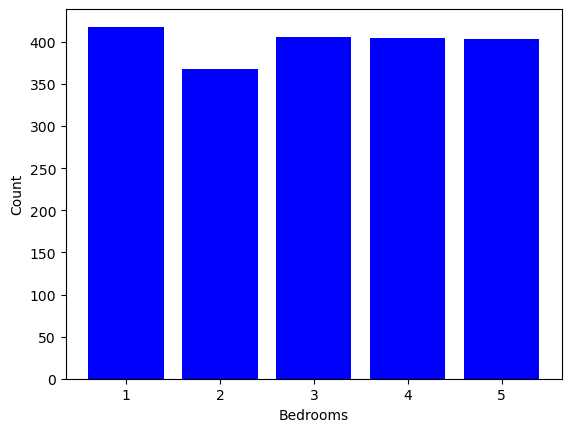

In [8]:
# Category

vc = data['Bedrooms'].value_counts()
plt.bar(vc.index, height = vc , color = 'b')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

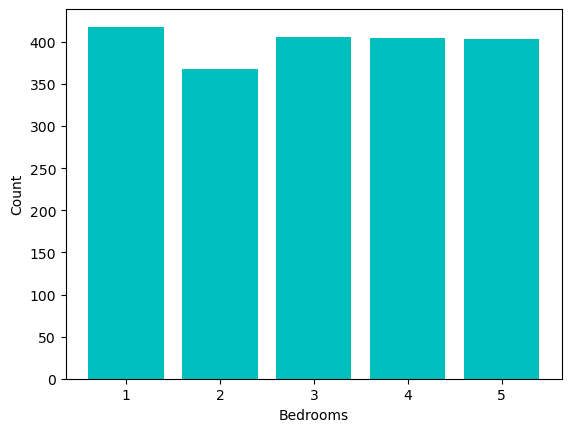

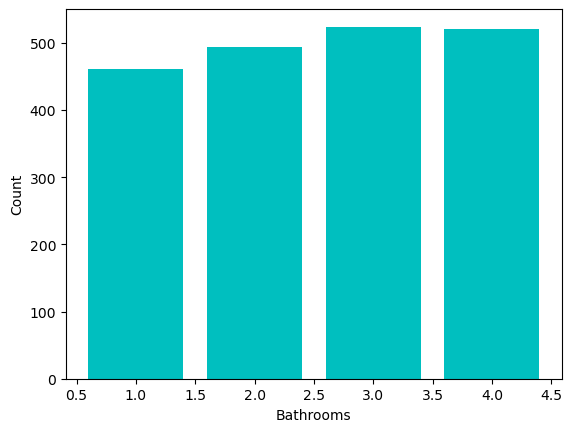

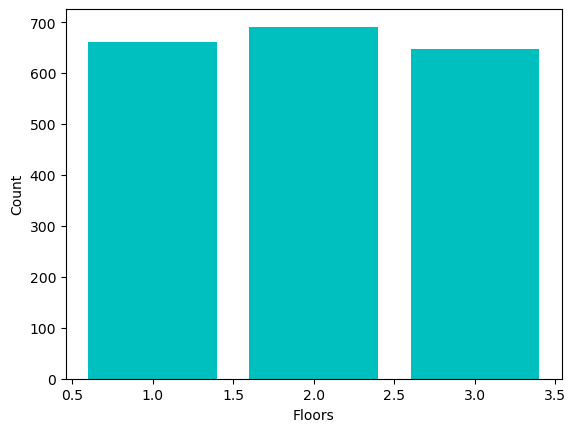

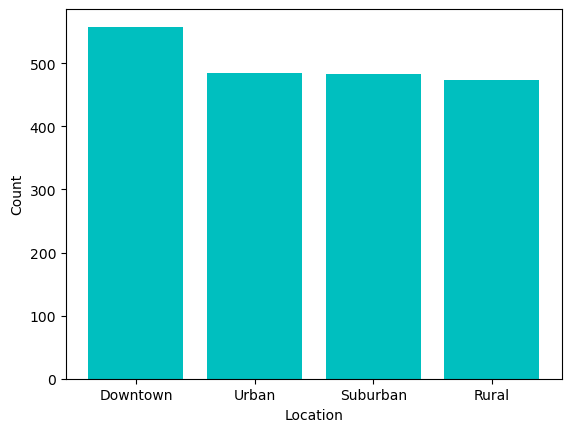

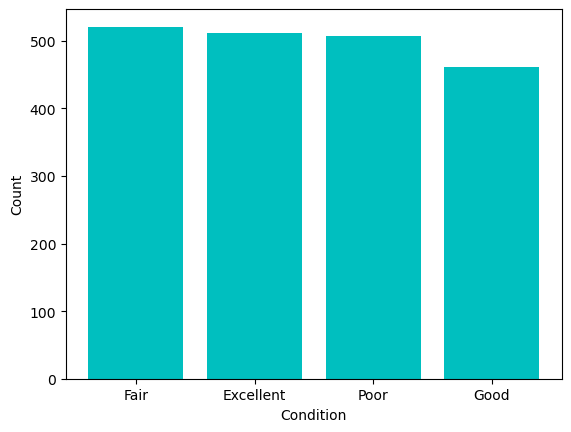

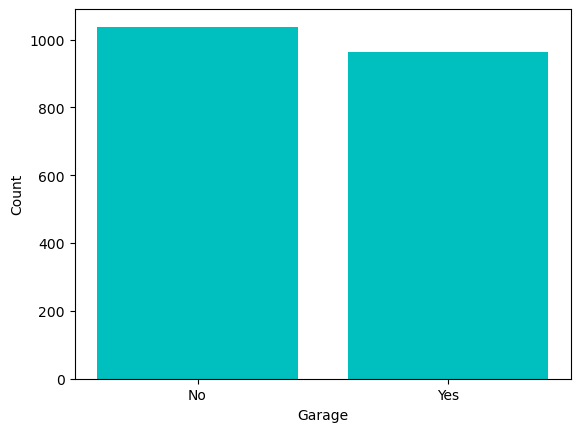

In [9]:
for i in cat:
    vc = data[i].value_counts()
    plt.bar(vc.index, height = vc , color = 'c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

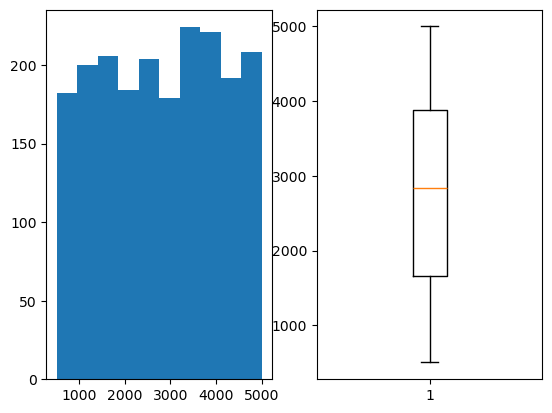

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].hist(data['Area'])
ax[1].boxplot(data['Area'])
plt.show()

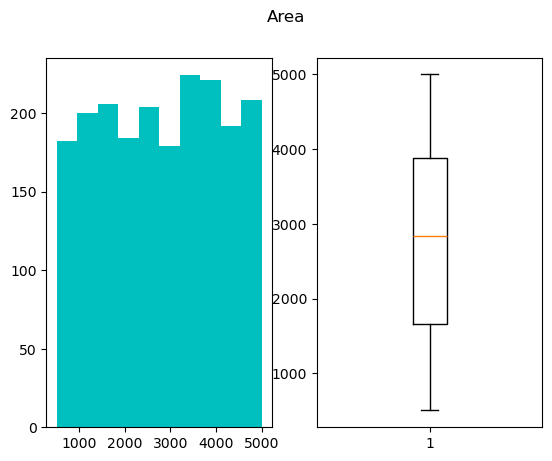

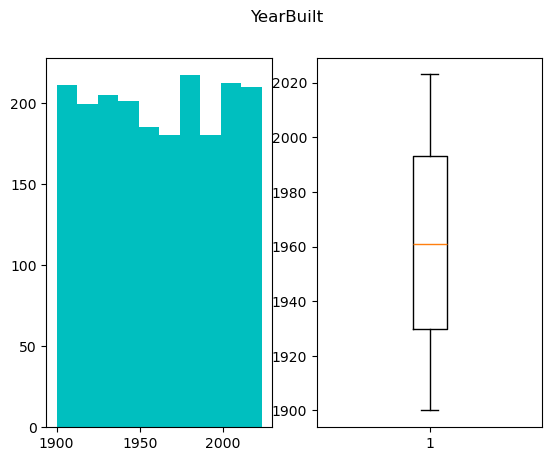

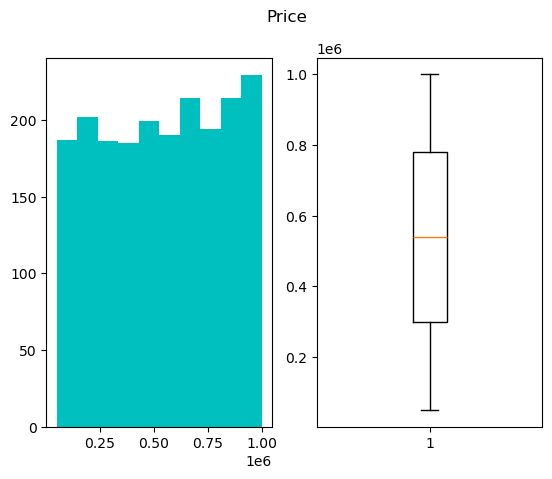

In [11]:

# Numerical


for i in num:
    fig, ax = plt.subplots(1,2)
    ax[0].hist(data[i],color = 'c')
    ax[1].boxplot(data[i])
    plt.suptitle(i)
    plt.show()

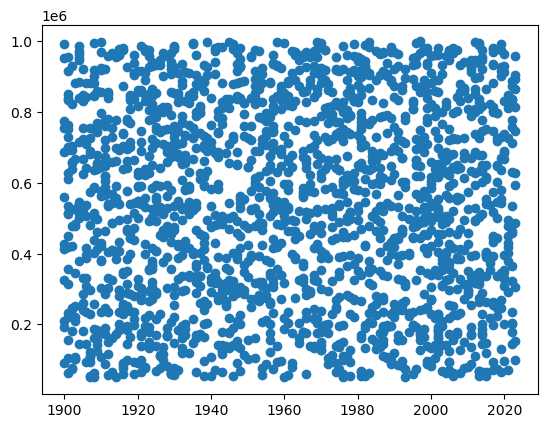

In [12]:
plt.scatter(data['YearBuilt'], data['Price'])

In [13]:
# One hot encoder 

from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe = OneHotEncoder(sparse_output = False)
locations = ohe.fit_transform(data[['Location']])
locations


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [15]:
data['Location']

0       Downtown
1       Downtown
2       Downtown
3       Suburban
4       Downtown
          ...   
1995    Suburban
1996    Suburban
1997       Rural
1998       Urban
1999    Suburban
Name: Location, Length: 2000, dtype: object

In [16]:
ohe.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [17]:
location_df = pd.DataFrame(locations, columns = ohe.categories_)
location_df = location_df.iloc[:,1:]

In [18]:
data = pd.concat([data, location_df], axis = 1)
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [19]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [20]:
data['Condition'].nunique()   # Ordinal data 

4

In [21]:
data['Condition'] = data[['Condition']].replace(to_replace = ['Excellent','Good','Fair','Poor'], value = [3,2,1,0])

In [22]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,Yes,161119,0.0,0.0,1.0


In [23]:
data['Garage'].nunique()

2

In [24]:
data['Garage'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
data['Garage'] = data[['Garage']].replace(to_replace = ['Yes','No'], value = [1,0])

In [26]:
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,0,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,0,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,0,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,1,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,1,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,0,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,1,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,0,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,1,161119,0.0,0.0,1.0


In [27]:
X_df = data.drop(['Location','Price'], axis = 1)
y = data['Price']
X_df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,0,0.0,0.0,0.0
1,4272,5,4,3,1958,3,0,0.0,0.0,0.0
2,3592,2,2,3,1938,2,0,0.0,0.0,0.0
3,966,4,2,2,1902,1,1,0.0,1.0,0.0
4,4926,1,4,2,1975,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,0,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,1,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,0,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,1,0.0,0.0,1.0


In [28]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [29]:
X = X_df.values

In [30]:
Y = y.values

In [31]:
X

array([[1.360e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.272e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.592e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.062e+03, 5.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.062e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.989e+03, 5.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [32]:
Y

array([149919, 424998, 266746, ..., 476925, 161119, 482525], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [37]:
y_train_pred = lr_model.predict(x_train)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

In [39]:
mse_t = mean_squared_error(y_train, y_train_pred)  # Correct order
rmse_t = np.sqrt(mse_t)  # RMSE = sqrt of MSE
mae_t = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)  # Correct order

# Print results
print("MSE (Train):", mse_t)
print("RMSE (Train):", rmse_t)
print("MAE (Train):", mae_t)
print("R² Score (Train):", r2_train)


MSE (Train): 77493835068.88966
RMSE (Train): 278377.1453781536
MAE (Train): 241404.41501856488
R² Score (Train): 0.005990048684153981


In [40]:
y_test_pred = lr_model.predict(x_test)


In [41]:
mse_test = mean_squared_error(y_test, y_test_pred)  # Correct order
rmse_test = np.sqrt(mse_test)  # RMSE = sqrt of MSE
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)  # Correct order

# Print results
print("MSE (Test):", mse_test)
print("RMSE (Test):", rmse_test)
print("MAE (Test):", mae_test)
print("R² Score (Test):", r2_test)


MSE (Test): 69950148039.25958
RMSE (Test): 264480.90297649015
MAE (Test): 226115.13920729904
R² Score (Test): -0.0005046830542836389


In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson as dw
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import probplot, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

def test_linear_regression_assumptions(x, y, x_df):
    """ 
    Tests key assumptions of linear regression: Linearity, Independence, Homoscedasticity,
    Normality, and No Multicollinearity.

    Parameters:
    x (DataFrame): Independent variables
    y (Series): Dependent variable
    x_df (DataFrame): Original independent variable dataframe (before adding constant)

    Returns: 
    None
    """

    # Add constant for intercept
    x = sm.add_constant(x)

    # Fit OLS model
    ols_model = sm.OLS(y, x).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues

    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='red', linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.\n")

    # 2. No Autocorrelations: Independence of Errors (Durbin-Watson Test)
    print("2. Independence of Errors (Durbin-Watson test):\n")
    dw_stat = dw(residuals)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if 1.5 <= dw_stat <= 2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity (Breusch-Pagan Test)
    print("3. Homoscedasticity (Breusch-Pagan Test):\n")
    bp_test = het_breuschpagan(residuals, x)
    print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] > 0.05:
        print("Residuals have constant variance (Homoscedasticity).\n")
    else:
        print("Residuals do not have constant variance (Heteroscedasticity). Consider GLS or transformations.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals are normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformations or robust regression.\n")

    # 5. Multicollinearity (Variance Inflation Factor)
    print("5. Multicollinearity (Variance Inflation Factor):\n")
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_df.columns
    vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")

1. Linearity:



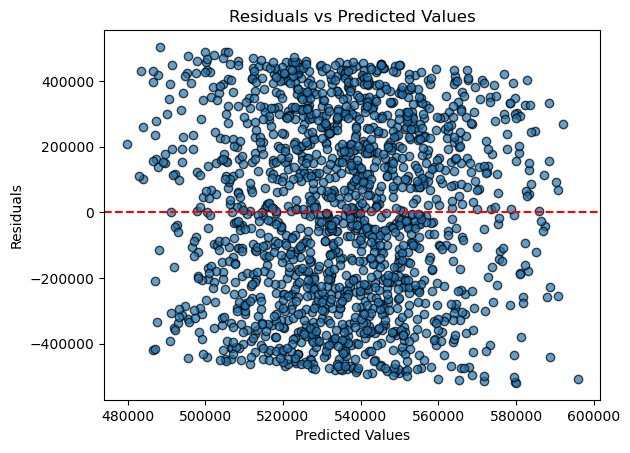

Check if the residuals are randomly scattered around 0. Non-random patterns indicate non-linearity.

2. Independence of Errors (Durbin-Watson test):

Durbin-Watson statistic: 2.0109193267110332
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test):

Lagrange Multiplier Statistic: 10.876761574347782
p-value: 0.367199747317463
Residuals have constant variance (Homoscedasticity).

4. Normality of Errors:



C:\Users\91981\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


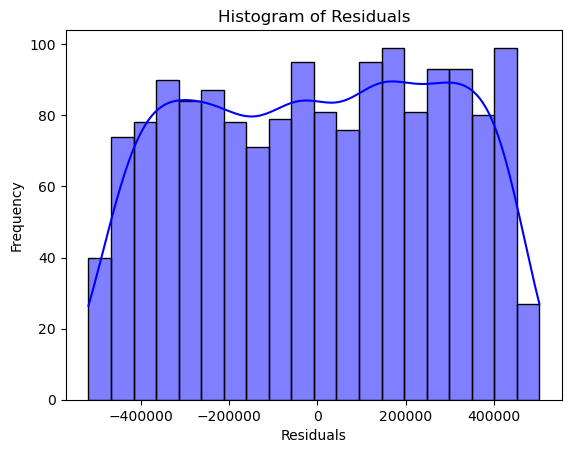

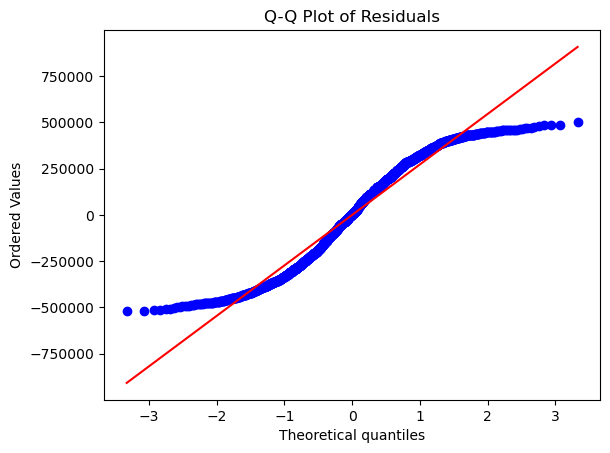

Shapiro-Wilk Test p-value: 8.376471937999511e-22
Residuals are not normally distributed. Consider transformations or robust regression.

5. Multicollinearity (Variance Inflation Factor):

       Feature        VIF
0         Area   5.637487
1     Bedrooms   5.461421
2    Bathrooms   6.303591
3       Floors   7.068938
4    YearBuilt  26.095359
5    Condition   2.753059
6       Garage   1.936333
7     (Rural,)   1.852613
8  (Suburban,)   1.866990
9     (Urban,)   1.868833
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [43]:
test_linear_regression_assumptions(x_train,y_train,X_df)

# Lasso

In [167]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Lasso Model
l1 = Lasso(alpha=1.0)
l1.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l1 = l1.predict(x_train)

# Metrics Calculation on Training Data
mse_l1_train = mean_squared_error(y_train, y_pred_train_l1)
rmse_l1_train = mean_squared_error(y_train, y_pred_train_l1, squared=False)  # Correct RMSE calculation
mae_l1_train = mean_absolute_error(y_train, y_pred_train_l1)
r2_l1_train = r2_score(y_train, y_pred_train_l1)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l1_train)
print("RMSE:", rmse_l1_train)
print("MAE:", mae_l1_train)
print("R²:", r2_l1_train)

# Predictions on Test Data
y_pred_test_l1 = l1.predict(x_test)

# **Corrected Order: (y_true, y_pred)**
mse_l1_test = mean_squared_error(y_test, y_pred_test_l1)
rmse_l1_test = mean_squared_error(y_test, y_pred_test_l1, squared=False)  # Correct RMSE calculation
mae_l1_test = mean_absolute_error(y_test, y_pred_test_l1)
r2_l1_test = r2_score(y_test, y_pred_test_l1)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l1_test)
print("RMSE:", rmse_l1_test)
print("MAE:", mae_l1_test)
print("R²:", r2_l1_test)



Training Performance:
MSE: 75474359160.76152
RMSE: 274725.9710343409
MAE: 237119.93339532704
R²: 0.007014588958499934

Test Performance:
MSE: 78076319869.6887
RMSE: 279421.40195355244
MAE: 242349.9119403196
R²: -0.0035667805681462994


# Ridge 

In [165]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Ridge Model
l2 = Ridge(alpha=1.0)
l2.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l2 = l2.predict(x_train)

# Metrics Calculation on Training Data
mse_l2_train = mean_squared_error(y_train, y_pred_train_l2)
rmse_l2_train = mean_squared_error(y_train, y_pred_train_l2, squared=False)  # Correct RMSE calculation
mae_l2_train = mean_absolute_error(y_train, y_pred_train_l2)
r2_l2_train = r2_score(y_train, y_pred_train_l2)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l2_train)
print("RMSE:", rmse_l2_train)
print("MAE:", mae_l2_train)
print("R²:", r2_l2_train)

# Predictions on Test Data
y_pred_test_l2 = l2.predict(x_test)

# Metrics Calculation on Test Data
mse_l2_test = mean_squared_error(y_test, y_pred_test_l2)
rmse_l2_test = mean_squared_error(y_test, y_pred_test_l2, squared=False)  # Correct RMSE calculation
mae_l2_test = mean_absolute_error(y_test, y_pred_test_l2)
r2_l2_test = r2_score(y_test, y_pred_test_l2)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l2_test)
print("RMSE:", rmse_l2_test)
print("MAE:", mae_l2_test)
print("R²:", r2_l2_test)



Training Performance:
MSE: 75474377711.05524
RMSE: 274726.00479578786
MAE: 237122.6911759961
R²: 0.007014344899838765

Test Performance:
MSE: 78072089255.4076
RMSE: 279413.83153918415
MAE: 242346.19253849014
R²: -0.0035124016737388963


# Elastic net

In [170]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize ElasticNet (L1 + L2 regularization)
l1_l2 = ElasticNet(alpha=1.0)
l1_l2.fit(x_train, y_train)

# Predictions on Training Data
y_pred_train_l1_l2 = l1_l2.predict(x_train)

# Metrics Calculation on Training Data
mse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2)
rmse_l1_l2_train = mean_squared_error(y_train, y_pred_train_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_train = mean_absolute_error(y_train, y_pred_train_l1_l2)
r2_l1_l2_train = r2_score(y_train, y_pred_train_l1_l2)

# Printing Training Results
print("Training Performance:")
print("MSE:", mse_l1_l2_train)
print("RMSE:", rmse_l1_l2_train)
print("MAE:", mae_l1_l2_train)
print("R²:", r2_l1_l2_train)

# Predictions on Test Data
y_pred_test_l1_l2 = l1_l2.predict(x_test)

# Metrics Calculation on Test Data
mse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2)
rmse_l1_l2_test = mean_squared_error(y_test, y_pred_test_l1_l2, squared=False)  # Correct RMSE calculation
mae_l1_l2_test = mean_absolute_error(y_test, y_pred_test_l1_l2)
r2_l1_l2_test = r2_score(y_test, y_pred_test_l1_l2)

# Printing Test Results
print("\nTest Performance:")
print("MSE:", mse_l1_l2_test)
print("RMSE:", rmse_l1_l2_test)
print("MAE:", mae_l1_l2_test)
print("R²:", r2_l1_l2_test)


Training Performance:
MSE: 75683519371.96089
RMSE: 275106.37828294875
MAE: 237643.1917993316
R²: 0.004262753227785576

Test Performance:
MSE: 77730241221.63719
RMSE: 278801.4369074112
MAE: 242073.70063296735
R²: 0.000881598085305968


# Polynomial regression --- y = mx*2 + c

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

In [53]:
x_train[0].size

10

In [54]:
X_poly_train[0].size

66

In [55]:
x_train[0]

array([1.216e+03, 3.000e+00, 2.000e+00, 1.000e+00, 1.947e+03, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

In [56]:
X_poly_train[0]

array([1.000000e+00, 1.216000e+03, 3.000000e+00, 2.000000e+00,
       1.000000e+00, 1.947000e+03, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 1.478656e+06,
       3.648000e+03, 2.432000e+03, 1.216000e+03, 2.367552e+06,
       0.000000e+00, 0.000000e+00, 1.216000e+03, 0.000000e+00,
       0.000000e+00, 9.000000e+00, 6.000000e+00, 3.000000e+00,
       5.841000e+03, 0.000000e+00, 0.000000e+00, 3.000000e+00,
       0.000000e+00, 0.000000e+00, 4.000000e+00, 2.000000e+00,
       3.894000e+03, 0.000000e+00, 0.000000e+00, 2.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 1.947000e+03,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 3.790809e+06, 0.000000e+00, 0.000000e+00,
       1.947000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

In [57]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

array([501083.0464158 , 561443.70246614, 440790.74404364, ...,
       556211.87861175, 520856.03632057, 524979.96019948])

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
mse_poly_train = mean_squared_error(y_train, y_poly_pred)  
rmse_poly_train = mean_squared_error(y_train, y_poly_pred) ** 0.5  # RMSE is sqrt of MSE
mae_poly_train = mean_absolute_error(y_train, y_poly_pred)  
r2_poly_train = r2_score(y_train, y_poly_pred)  

# Print results
print("MSE (Train):", mse_poly_train)
print("RMSE (Train):", rmse_poly_train)
print("MAE (Train):", mae_poly_train)
print("R² Score (Train):", r2_poly_train)

MSE (Train): 75312989993.36847
RMSE (Train): 274432.12274325406
MAE (Train): 236584.88053280234
R² Score (Train): 0.03396365078319996


In [60]:
# Test 

In [61]:
y_poly_test_pred = poly_model.predict(X_poly_test)

In [62]:
# Calculating evaluation metrics
mse_poly_test = mean_squared_error(y_test, y_poly_test_pred)
rmse_poly_test = mse_poly_test ** 0.5  # RMSE is the square root of MSE
mae_poly_test = mean_absolute_error(y_test, y_poly_test_pred)
r2_poly_test = r2_score(y_test, y_poly_test_pred)  # Corrected order

# Printing the results
print("MSE (Test):", mse_poly_test)
print("RMSE (Test):", rmse_poly_test)
print("MAE (Test):", mae_poly_test)
print("R² Score (Test):", r2_poly_test)


MSE (Test): 71079525770.92743
RMSE (Test): 266607.43757616257
MAE (Test): 225985.53925153724
R² Score (Test): -0.01665829732307267


# KNN Regression

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the KNN Regressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)

# Predictions on Training Data
y_train_knn = knn_r.predict(x_train)

# Training Metrics
mse_knn_train = mean_squared_error(y_train, y_train_knn)
rmse_knn_train = mse_knn_train ** 0.5
mae_knn_train = mean_absolute_error(y_train, y_train_knn)
r2_knn_train = r2_score(y_train, y_train_knn)

print("Training Metrics:")
print("MSE:", mse_knn_train)
print("RMSE:", rmse_knn_train)
print("MAE:", mae_knn_train)
print("R² Score:", r2_knn_train)

# Predictions on Test Data
y_test_knn = knn_r.predict(x_test)

# Testing Metrics
mse_knn_test = mean_squared_error(y_test, y_test_knn)
rmse_knn_test = mse_knn_test ** 0.5
mae_knn_test = mean_absolute_error(y_test, y_test_knn)
r2_knn_test = r2_score(y_test, y_test_knn)

print("\nTesting Metrics:")
print("MSE:", mse_knn_test)
print("RMSE:", rmse_knn_test)
print("MAE:", mae_knn_test)
print("R² Score:", r2_knn_test)


Training Metrics:
MSE: 62241443102.0991
RMSE: 249482.35028173655
MAE: 208717.44225000002
R² Score: 0.2016317972552757

Testing Metrics:
MSE: 86206882360.0464
RMSE: 293610.08558979444
MAE: 249415.65
R² Score: -0.23302654719655513


# Support Vector Regression

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the SVR model
svr = SVR()
svr.fit(x_train, y_train)

# Predictions on Training Data
y_train_svr = svr.predict(x_train)

# Training Metrics
mse_svr_train = mean_squared_error(y_train, y_train_svr)  # Corrected order
rmse_svr_train = mse_svr_train ** 0.5  # Taking square root for RMSE
mae_svr_train = mean_absolute_error(y_train, y_train_svr)
r2_svr_train = r2_score(y_train, y_train_svr)

print("Training Metrics:")
print("MSE:", mse_svr_train)
print("RMSE:", rmse_svr_train)
print("MAE:", mae_svr_train)
print("R² Score:", r2_svr_train)

# Predictions on Test Data
y_test_svr = svr.predict(x_test)

# Testing Metrics
mse_svr_test = mean_squared_error(y_test, y_test_svr)
rmse_svr_test = mse_svr_test ** 0.5
mae_svr_test = mean_absolute_error(y_test, y_test_svr)
r2_svr_test = r2_score(y_test, y_test_svr)

print("\nTesting Metrics:")
print("MSE:", mse_svr_test)
print("RMSE:", rmse_svr_test)
print("MAE:", mae_svr_test)
print("R² Score:", r2_svr_test)


Training Metrics:
MSE: 77976591027.4183
RMSE: 279242.8889469136
MAE: 242440.25955444865
R² Score: -0.00020224037223237623

Testing Metrics:
MSE: 69979456910.77007
RMSE: 264536.3054682099
MAE: 225485.53196873146
R² Score: -0.000923891076328287


# Decision tree regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth= 10, random_state=0)
dtree.fit(x_train, y_train)

# Predictions on Training Data
y_train_dtree = dtree.predict(x_train)

# Training Metrics
mse_dtree_train = mean_squared_error(y_train, y_train_dtree)  # Corrected order
rmse_dtree_train = mse_dtree_train ** 0.5  # Taking square root for RMSE
mae_dtree_train = mean_absolute_error(y_train, y_train_dtree)
r2_dtree_train = r2_score(y_train, y_train_dtree)

print("Training Metrics:")
print("MSE:", mse_dtree_train)
print("RMSE:", rmse_dtree_train)
print("MAE:", mae_dtree_train)
print("R² Score:", r2_dtree_train)

# Predictions on Test Data
y_test_dtree = dtree.predict(x_test)

# Testing Metrics
mse_dtree_test = mean_squared_error(y_test, y_test_dtree)
rmse_dtree_test = mse_dtree_test ** 0.5
mae_dtree_test = mean_absolute_error(y_test, y_test_dtree)
r2_dtree_test = r2_score(y_test, y_test_dtree)

print("\nTesting Metrics:")
print("MSE:", mse_dtree_test)
print("RMSE:", rmse_dtree_test)
print("MAE:", mae_dtree_test)
print("R² Score:", r2_dtree_test)


Training Metrics:
MSE: 50497289545.56944
RMSE: 224716.01977956409
MAE: 167837.78971594886
R² Score: 0.35227352887940044

Testing Metrics:
MSE: 92513934603.94145
RMSE: 304161.03399998735
MAE: 246915.1649646245
R² Score: -0.323237011122141


# Random forest regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the Random Forest Regressor
forest = RandomForestRegressor(max_depth= 20, n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

# Predictions on Training Data
y_train_forest = forest.predict(x_train)

# Training Metrics
mse_forest_train = mean_squared_error(y_train, y_train_forest)  # Corrected order
rmse_forest_train = mse_forest_train ** 0.5  # Taking square root for RMSE
mae_forest_train = mean_absolute_error(y_train, y_train_forest)
r2_forest_train = r2_score(y_train, y_train_forest)

print("Training Metrics:")
print("MSE:", mse_forest_train)
print("RMSE:", rmse_forest_train)
print("MAE:", mae_forest_train)
print("R² Score:", r2_forest_train)

# Predictions on Test Data
y_test_forest = forest.predict(x_test)

# Testing Metrics
mse_forest_test = mean_squared_error(y_test, y_test_forest)
rmse_forest_test = mse_forest_test ** 0.5
mae_forest_test = mean_absolute_error(y_test, y_test_forest)
r2_forest_test = r2_score(y_test, y_test_forest)

print("\nTesting Metrics:")
print("MSE:", mse_forest_test)
print("RMSE:", rmse_forest_test)
print("MAE:", mae_forest_test)
print("R² Score:", r2_forest_test)


Training Metrics:
MSE: 12851865341.98795
RMSE: 113366.0678597787
MAE: 96456.74928959832
R² Score: 0.8351496989205558

Testing Metrics:
MSE: 73752241648.846
RMSE: 271573.6394587037
MAE: 231647.20535501343
R² Score: -0.054886447331136345


# Xgboost regression

In [72]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

# Evaluate Model Performance
mse_xgb_train = mean_squared_error(y_train, y_pred_train_xgb)
rmse_xgb_train = mse_xgb_train ** 0.5
mae_xgb_train = mean_absolute_error(y_train, y_pred_train_xgb)
r2_xgb_train = r2_score(y_train, y_pred_train_xgb)

mse_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
rmse_xgb_test = mse_xgb_test ** 0.5
mae_xgb_test = mean_absolute_error(y_test, y_pred_test_xgb)
r2_xgb_test = r2_score(y_test, y_pred_test_xgb)

# Print results
print("Train Performance:")
print("MSE:", mse_xgb_train)
print("RMSE:", rmse_xgb_train)
print("MAE:", mae_xgb_train)
print("R²:", r2_xgb_train)

print("\nTest Performance:")
print("MSE:", mse_xgb_test)
print("RMSE:", rmse_xgb_test)
print("MAE:", mae_xgb_test)
print("R²:", r2_xgb_test)

Train Performance:
MSE: 23420337599.61147
RMSE: 153037.04649401552
MAE: 125017.60021484375
R²: 0.6995883786562477

Test Performance:
MSE: 80384226888.2018
RMSE: 283521.1224727389
MAE: 240470.7443359375
R²: -0.14974446373159145
